In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
#from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import plotly.express as px


In [9]:
datA = pd.read_csv("WTGA.csv")
datB = pd.read_csv("WTGB.csv")
datC = pd.read_csv("WTGC.csv")
datD = pd.read_csv("WTGD.csv")
datE = pd.read_csv("WTGE.csv")
datF = pd.read_csv("WTGF.csv")
datG = pd.read_csv("WTGG.csv")
datH = pd.read_csv("WTGH.csv")
datI = pd.read_csv("WTGI.csv")
datJ = pd.read_csv("WTGJ.csv")

start = "2021-09-20 00:00:00"
end = "2022-09-20 00:00:00"
interval = "00:10:00"

/var/folders/19/6hz5c0tn7g317trnm9tqf_900000gn/T/ipykernel_17616/245569938.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  datA = pd.read_csv("WTGA.csv")
/var/folders/19/6hz5c0tn7g317trnm9tqf_900000gn/T/ipykernel_17616/245569938.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,95,96,97,98,99,10

In [57]:
data = pd.read_csv("cleanDatA.csv")

data = data.drop(["Unnamed: 0","Turbine", "Date & Time"], axis = 1)

for column in data.columns:
    data[column] = (data[column] - data[column].mean())  / data[column].std()

nullCol = data.columns[data.isna().sum() > 0]
data = data.drop(nullCol, axis = 1)


In [26]:
data = data.drop(["Unnamed: 0","Turbine", "Date & Time"], axis = 1)

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def silhoetteScores(data, lower = 2, upper = 10):
    silhoetteScores = {}

    for k in range(lower,upper):
        print(f"Iteration: {k}")
        kmean_iter = KMeans(n_clusters = k)
        kmean_iter.fit(data)
        
        labels = kmean_iter.labels_
        silhoetteScores[k] = silhouette_score(data, labels)

    return silhoetteScores


In [18]:
def scatPlot(x, y, xLab = "x", yLab = "y", title = "Plot"):
    plt.plot(x, y)
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.title(title)
    plt.show()

In [59]:
data

(GRID) OPERATING TIME  (GRID) OPERATING TIME UP TO LAST MONTH  \
0                  -1.738051                               -1.862232   
1                  -1.738051                               -1.862232   
2                  -1.737805                               -1.862232   
3                  -1.737805                               -1.862232   
4                  -1.737559                               -1.862232   
...                      ...                                     ...   
46577               2.244330                                2.157372   
46578               2.244576                                2.157372   
46579               2.244822                                2.157372   
46580               2.244822                                2.157372   
46581               2.245068                                2.157372   

       Average Air Density 82m  AXIS 3 BATTERY CABINET TEMPERATURE  \
0                    -1.986125                            1.245600   
1                    -1.986125                            1.242804   
2                    -1.986125                            1.240007   
3                    -1.986125                            1.237211   
4                    -1.986125                            1.159415   
...                        ...                                 ...   
46577                 0.445990                            1.343940   
46578                 0.446439                            1.342796   
46579                 0.446888                            1.341652   
46580                 0.447338                            1.340508   
46581                 0.447787                            1.339364   

       AXIS 1 CONTROL CABINET TEMPERATURE  AXIS 2 CONTROL CABINET TEMPERATURE  \
0                                1.068043                            1.071597   
1                                1.065631                            1.069199   
2                                1.063219                            1.066801   
3                                1.060807                            1.064403   
4                                1.058395                            0.981547   
...                                   ...                                 ...   
46577                            1.249698                            1.261789   
46578                            1.248758                            1.261317   
46579                            1.247817                            1.260846   
46580                            1.246876                            1.173386   
46581                            1.245935                            1.172573   

       AXIS 3 CONTROL CABINET TEMPERATURE  BLADE 1 - ACTUAL VALUE  \
0                                1.093324               -0.613881   
1                                1.090902               -0.643406   
2                                1.016375               -0.642631   
3                                1.015782               -0.644948   
4                                1.015189               -0.683435   
...                                   ...                     ...   
46577                            1.198494               -0.871869   
46578                            1.198217               -0.730367   
46579                            1.197941               -0.787385   
46580                            1.197664               -0.809301   
46581                            1.197388               -0.803752   

       BLADE 1 - SET VALUE  BLADE 2 - ACTUAL VALUE  ...  WEATHER OUTAGE  \
0                -0.625479               -0.609099  ...       -1.262601   
1                -0.644300               -0.644477  ...       -1.262601   
2                -0.642973               -0.643926  ...       -1.262601   
3                -0.646360               -0.646070  ...       -1.262601   
4                -0.683806               -0.684633  ...       -1.262601   
...                    ...                     ..

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


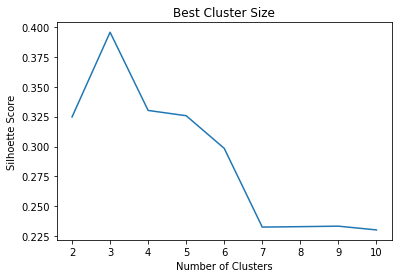

In [66]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

silList = silhoetteScores(data, lower = 2, upper = 11)

x = list(silList.keys())
y = list(silList.values())
scatPlot(x, y, xLab = "Number of Clusters", yLab = "Silhoette Score", title = "Best Cluster Size")

k = max(silList, key=silList.get)

kmeans = KMeans(n_clusters = k)
kmeans.fit(data)

pca = PCA(n_components = 3)
# tsne = TSNE(n_components = 3, learning_rate = "auto",
#      init='pca', verbose = 1, )
X3D = pca.fit_transform(data)

In [68]:
pcaData = pd.DataFrame(X3D, columns = ['x','y','z'])

#pcaData = dfInfo.merge(pcaData, left_index = True, right_index = True)

fig = px.scatter_3d(pcaData, x='x', y='y', z='z',
                    color=kmeans.labels_)
fig.show()

In [38]:
datA["Date & Time"] = pd.to_datetime(datA["Date & Time"])
datA["Date & Time"]

0                       NaT
1       2021-09-20 00:00:00
2       2021-09-20 00:10:00
3       2021-09-20 00:20:00
4       2021-09-20 00:30:00
                ...        
52557   2022-09-19 23:20:00
52558   2022-09-19 23:30:00
52559   2022-09-19 23:40:00
52560   2022-09-19 23:50:00
52561   2022-09-20 00:00:00
Name: Date & Time, Length: 52562, dtype: datetime64[ns]

In [44]:
#datA.head(8)
from datetime import datetime, timedelta
 
# Using current time
time_now = datetime.now()
range = time_now - timedelta(days = 44)


x = datA["Date & Time"]
y = datA["WTG-A (2.82-FDR 2A) - WIND SPEED"]

fig = px.scatter(datA[datA["Date & Time"] > range], "Date & Time", "WTG-A (2.82-FDR 2A) - WIND SPEED")
fig.show()

In [12]:
dats = [datA, datB, datC, datD, datE, datF, datG, datH, datI, datJ]

In [14]:
for d in dats:
    print(d.shape)

(52562, 130)
(52562, 130)
(52562, 130)
(52562, 130)
(52562, 130)
(52562, 130)
(52562, 130)
(52562, 130)
(52562, 130)
(52562, 130)


In [17]:
for dat in dats:
    print((dat.isnull().sum() / len(dat)*100).sort_values(ascending = False).head(3))

Turbine                                           0.001903
Date & Time                                       0.001903
WTG-A (2.82-FDR 2A) - PHASE C DISPOSAL VOLTAGE    0.000000
dtype: float64
Turbine                                           0.001903
Date & Time                                       0.001903
WTG-B (2.82-FDR 2A) - PHASE C DISPOSAL VOLTAGE    0.000000
dtype: float64
Turbine                                           0.001903
Date & Time                                       0.001903
WTG-C (2.82-FDR 2A) - PHASE C DISPOSAL VOLTAGE    0.000000
dtype: float64
Turbine                                           0.001903
Date & Time                                       0.001903
WTG-D (2.82-FDR 2A) - PHASE C DISPOSAL VOLTAGE    0.000000
dtype: float64
Turbine                                           0.001903
Date & Time                                       0.001903
WTG-E (2.82-FDR 2A) - PHASE C DISPOSAL VOLTAGE    0.000000
dtype: float64
Turbine                                 

In [27]:
dat[dat.isnull().any(axis=1)]

Empty DataFrame
Columns: [Turbine, Date & Time, WTG-A (2.82-FDR 2A) - (GRID) OPERATING TIME, WTG-A (2.82-FDR 2A) - (GRID) OPERATING TIME UP TO LAST MONTH, Average Air Density 82m, WTG-A (2.82-FDR 2A) - AUX SENSOR MEAS FOR CONFIGSTOP, WTG-A (2.82-FDR 2A) - AUXILIARY TRANSFORMER TEMPERATURE, WTG-A (2.82-FDR 2A) - AXIS 3 BATTERY CABINET TEMPERATURE, WTG-A (2.82-FDR 2A) - AXIS 1 CONTROL CABINET TEMPERATURE, WTG-A (2.82-FDR 2A) - AXIS 2 CONTROL CABINET TEMPERATURE, WTG-A (2.82-FDR 2A) - AXIS 3 CONTROL CABINET TEMPERATURE, WTG-A (2.82-FDR 2A) - BLADE 1 - ACTUAL VALUE, WTG-A (2.82-FDR 2A) - BLADE 1 - SET VALUE, WTG-A (2.82-FDR 2A) - BLADE 2 - ACTUAL VALUE, WTG-A (2.82-FDR 2A) - BLADE 2 - SET VALUE, WTG-A (2.82-FDR 2A) - BLADE 3 - ACTUAL VALUE, WTG-A (2.82-FDR 2A) - BLADE 3 - SET VALUE, WTG-A (2.82-FDR 2A) - CIRCUIT BREAKER CUT-INS, WTG-A (2.82-FDR 2A) - CONSUMPTION, WTG-A (2.82-FDR 2A) - CONSUMPTION UP TO LAST MONTH, WTG-A (2.82-FDR 2A) - CONVERTER TORQUE REFERENCE, WTG-A (2.82-FDR 2A) - CURRENT PHASE A, WTG-A (2.82-FDR 2A) - CURRENT PHASE B, WTG-A (2.82-FDR 2A) - CURRENT PHASE C, WTG-A (2.82-FDR 2A) - CUSTOMER STOP TIME, WTG-A (2.82-FDR 2A) - CUSTOMER STOP TIME LAST MONTH, WTG-A (2.82-FDR 2A) - DOWN TIME, WTG-A (2.82-FDR 2A) - DRIVE TRAIN ACCELERATION, WTG-A (2.82-FDR 2A) - DTA FIRE ALARM WITH SHUTDOWN (OPTION), WTG-A (2.82-FDR 2A) - EXPECTED POWER, WTG-A (2.82-FDR 2A) - EXT. CURT. DETECTION ON TIME, WTG-A (2.82-FDR 2A) - EXTERNAL STOP POWER TIME, WTG-A (2.82-FDR 2A) - EXTERNAL STOP POWER TIME UP TO LAST MONTH, WTG-A (2.82-FDR 2A) - EXTERNAL STOP TIME, WTG-A (2.82-FDR 2A) - EXTERNAL STOP TIME UP TO LAST MONTH, WTG-A (2.82-FDR 2A) - GEARBOX BEARING TEMPERATURE INTERMEDIATE SHAFT GENERATOR SIDE (ROTOR SIDE), WTG-A (2.82-FDR 2A) - GEARBOX SENSOR 1 DIRECT, WTG-A (2.82-FDR 2A) - GEARBOX SENSOR 2 DIRECT, WTG-A (2.82-FDR 2A) - GEARBOX SENSOR 3 DIRECT, WTG-A (2.82-FDR 2A) - GENERATOR INBOARD DIRECT, WTG-A (2.82-FDR 2A) - GENERATOR OUTBOARD DIRECT, WTG-A (2.82-FDR 2A) - GENERATOR ROTOR DISCONNECT SWITCH TEMPERATURE, WTG-A (2.82-FDR 2A) - GENERATOR SPEED (CCU), WTG-A (2.82-FDR 2A) - GENERATOR SPEED (PLC), WTG-A (2.82-FDR 2A) - GENERATOR TORQUE CALCULATED BY CU, WTG-A (2.82-FDR 2A) - GENERATOR WINDING 3 TEMPERATURE, WTG-A (2.82-FDR 2A) - GRID OUTAGE, WTG-A (2.82-FDR 2A) - GRID OUTAGE UP TO LAST MONTH, WTG-A (2.82-FDR 2A) - HYDRAULIC BRAKE PRESSURE, WTG-A (2.82-FDR 2A) - INT. CURT. DETECTION ON TIME, WTG-A (2.82-FDR 2A) - K1 BRAKE SWITCH, WTG-A (2.82-FDR 2A) - K1 COUNTER OBTAINER, WTG-A (2.82-FDR 2A) - KEY SWITCH MAINTENANCE, WTG-A (2.82-FDR 2A) - KEY SWITCH REPAIR, WTG-A (2.82-FDR 2A) - LINE FREQUENCY, WTG-A (2.82-FDR 2A) - MAIN BEARING DIRECT, WTG-A (2.82-FDR 2A) - MV TRANSFORMER WINDING V TEMPERATURE, WTG-A (2.82-FDR 2A) - MV TRANSFORMER WINDING W TEMPERATURE, WTG-A (2.82-FDR 2A) - N-SET 1, WTG-A (2.82-FDR 2A) - N-SET 2, WTG-A (2.82-FDR 2A) - NACELLE POSITION, WTG-A (2.82-FDR 2A) - NEW TURBINE CONDITION FOR SCADA, WTG-A (2.82-FDR 2A) - NEW TURBINE STATE FOR SCADA, WTG-A (2.82-FDR 2A) - OPERATING STATE, WTG-A (2.82-FDR 2A) - OUTAGE TIME UP TO LAST MONTH, WTG-A (2.82-FDR 2A) - PHASE A DISPOSAL VOLTAGE, WTG-A (2.82-FDR 2A) - PHASE B DISPOSAL VOLTAGE, WTG-A (2.82-FDR 2A) - PHASE C DISPOSAL VOLTAGE, WTG-A (2.82-FDR 2A) - PITCH REMAINTIMEFORBATTTEST, WTG-A (2.82-FDR 2A) - POWER, WTG-A (2.82-FDR 2A) - POWER FACTOR, WTG-A (2.82-FDR 2A) - PRODUCTION, WTG-A (2.82-FDR 2A) - PRODUCTION UP TO LAST MONTH, WTG-A (2.82-FDR 2A) - PT100 LVDP CABINET TEMPERATURE, WTG-A (2.82-FDR 2A) - PT100 DOWN TOWER CABINET TEMPERATURE, WTG-A (2.82-FDR 2A) - Q CAP, WTG-A (2.82-FDR 2A) - Q CAP ULM, WTG-A (2.82-FDR 2A) - Q IND, WTG-A (2.82-FDR 2A) - Q IND ULM, WTG-A (2.82-FDR 2A) - REACTIVE POWER, WTG-A (2.82-FDR 2A) - REPAIR TIME, WTG-A (2.82-FDR 2A) - REPAIR TIME UP TO LAST MONTH, WTG-A (2.82-FDR 2A) - ROTOR BEARING 2 TEMPERATURE, WTG-A (2.82-FDR 2A) - ROTOR SPEED (PLC), WTG-A (2.82-FDR 2A) - SERVICE TIME, WTG-A (2.82-FDR 2A) - SERVICE TIME UP TO LAST MONTH, WTG-A (2.82-FDR 

In [17]:
symbols = dat[dat.isnull().any(axis=1)]
dat = dat[dat['Turbine'].notna()]

Data Preprocessing

In [20]:
X = dat.drop(columns = ['Turbine'],axis=1)
Y = dat['Turbine']
X.head()

Date & Time WTG-A (2.82-FDR 2A) - (GRID) OPERATING TIME  \
1 2021-09-20 00:00:00                                     4629656   
2 2021-09-20 00:10:00                                     4629656   
3 2021-09-20 00:20:00                                     4630662   
4 2021-09-20 00:30:00                                     4630662   
5 2021-09-20 00:40:00                                     4631669   

  WTG-A (2.82-FDR 2A) - (GRID) OPERATING TIME UP TO LAST MONTH  \
1                                            3815967             
2                                            3815967             
3                                            3815967             
4                                            3815967             
5                                            3815967             

  Average Air Density 82m  \
1                 No Data   
2                 No Data   
3                 No Data   
4                 No Data   
5                 No Data   

  WTG-A (2.82-FDR 2A) - AUX SENSOR MEAS FOR CONFIGSTOP  \
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     
5                                                  0     

  WTG-A (2.82-FDR 2A) - AUXILIARY TRANSFORMER TEMPERATURE  \
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        
5                                                  0        

  WTG-A (2.82-FDR 2A) - AXIS 3 BATTERY CABINET TEMPERATURE  \
1                                           36.97094         
2                                          36.941082         
3                                          36.911228         
4                                          36.881374         
5                                          36.050785         

  WTG-A (2.82-FDR 2A) - AXIS 1 CONTROL CABINET TEMPERATURE  \
1                                           44.02623         
2                                          44.000099         
3                                          43.973965         
4                                          43.947834         
5                                            43.9217         

  WTG-A (2.82-FDR 2A) - AXIS 2 CONTROL CABINET TEMPERATURE  \
1                                          42.964161         
2                                          42.938545         
3                                          42.912933         
4                                          42.887318         
5                                          42.002331         

  WTG-A (2.82-FDR 2A) - AXIS 3 CONTROL CABINET TEMPERATURE  ...  \
1                                          43.858017        ...   
2                                          43.831852        ...   
3                                          43.026505        ...   
4                                            43.0201        ...   
5                                          43.013691        ...   

  WTG-A (2.82-FDR 2A) - WIND BOOST ENABLED  \
1                                    False   
2                                    False   
3                                    False   
4                                    False   
5                                    False   

  WTG-A (2.82-FDR 2A) - WIND BOOST RELEASED  \
1                                     False   
2                                     False   
3                                     False   
4                                     False   
5                                     False   

  WTG-A (2.82-FDR 2A) - WIND DEVIATION 1 SEC.  \
1                                   -4.098011   
2                                   -2.546392   
3                                           4   
4                            

In [26]:
X.dtypes

<bound method NDFrame._add_numeric_operations.<locals>.all of Date & Time                                                     datetime64[ns]
WTG-A (2.82-FDR 2A) - (GRID) OPERATING TIME                             object
WTG-A (2.82-FDR 2A) - (GRID) OPERATING TIME UP TO LAST MONTH            object
Average Air Density 82m                                                 object
WTG-A (2.82-FDR 2A) - AUX SENSOR MEAS FOR CONFIGSTOP                    object
                                                                     ...      
WTG-A (2.82-FDR 2A) - WIND DIRECTION STOP                               object
WTG-A (2.82-FDR 2A) - WIND DIRECTION STOP LAST MONTH                    object
WTG-A (2.82-FDR 2A) - WIND SPEED                                        object
WTG-A (2.82-FDR 2A) - YAW DEVIATION                                     object
WTG-A (2.82-FDR 2A) - YAW REVOLUTIONS TO UNTWIST                        object
Length: 129, dtype: object>

In [21]:
from dataclasses import dataclass


fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=X.shape[1])
fa.fit(X)
ev,_ = fa.get_eigenvalues()

plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Variance Explained')
plt.grid()

TypeError: float() argument must be a string or a number, not 'Timestamp'